In [0]:
import os
import numpy as np
import nibabel

%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import seaborn as sns

In [0]:
def trimmed_data_for_generator():
    print('-'*30)
    print('Creating training data...')
    print('-'*30)
    # train_data_path = os.path.join(data_path, 'train')
    data_path = 'Dataset/data/'
    seg_path = 'Dataset/seg/'
    training_images = os.listdir(data_path)
    training_masks =os.listdir(seg_path)    
    training_images.sort()
    training_masks.sort()
    print("Train size")
    print(len(training_images))
    print(len(training_masks))
    for ind, (liver, orig) in enumerate(zip(training_masks, training_images)):
        imgs_train = []  
        masks_train = []

        print(ind, liver, orig)
        training_mask = nibabel.load(os.path.join(seg_path, liver))
        training_image = nibabel.load(os.path.join(data_path, orig))

        img_3d = np.array(training_image.get_fdata(), dtype='float32')
        mask_3d = np.array(training_mask.get_fdata(), dtype='bool')
        print(img_3d.shape, mask_3d.shape)
        img_3d = np.rot90(img_3d)
        mask_3d = np.rot90(mask_3d)
        print(img_3d.shape, mask_3d.shape)
        break
    print('Saving to .npy files done.')

In [6]:
trimmed_data_for_generator()

------------------------------
Creating training data...
------------------------------


FileNotFoundError: ignored

In [0]:
def data_for_generator():
    print('-'*30)
    print('Creating training data...')
    print('-'*30)
    # train_data_path = os.path.join(data_path, 'train')
    data_path = 'Dataset/data/'
    seg_path = 'Dataset/seg/'
    images = os.listdir(data_path)
    masks = os.listdir(seg_path)

    images.sort()
    masks.sort()
    split = len(images) #Putting everything into training
    training_images = images[:split]
    training_masks = masks[:split]
    print("Train size")
    print(len(training_images))
    print(len(training_masks))
    blank_ctr = []
#     spr = np.load('eda_files/spr.npy')
#     pre_blanks_ind = np.load('eda_files/pre_blanks_ind.npy')
#     non_blanks_ind = np.load('eda_files/non_blanks_ind.npy')
#     post_blanks_ind = np.load('eda_files/post_blanks_ind.npy')
#     record_names = np.load('eda_files/record_dat.npy')
    for ind, (liver, orig) in enumerate(zip(training_masks, training_images)):
        imgs_train = []  
        masks_train = []
        blank_flag = 0
        pre_blanks = 0
        post_blanks = 0
        blk_cnt = 0
        non_blank_count = 0
        print(ind, liver, orig)
        training_mask = nibabel.load(os.path.join(seg_path, liver))
        training_image = nibabel.load(os.path.join(data_path, orig))

        image_rows = training_mask.shape[0]
        image_cols = training_mask.shape[1]
        print(training_image.shape)
        slice_ct = 0
        for k in range(training_mask.shape[2]):
            image_2d = np.array(training_image.get_data()[::, ::, k])
            mask_2d = np.array(training_mask.get_data()[::, ::, k])
            
            if len(np.unique(mask_2d)) == 1:
                if(blank_flag == 0):
                    pre_blanks += 1
                else:
                    post_blanks += 1
                blk_cnt += 1
                continue
            else:
                blank_flag = 1
                non_blank_count += 1       
                slice_ct += 1
            clip_mask2d = np.clip(mask_2d, 0, 1)
            image_2d = np.multiply(image_2d, clip_mask2d)
            mask_2d[mask_2d == 1] = 0
            mask_2d = np.clip(mask_2d, 0, 1)
            image_2d = np.rot90(image_2d)
#             image_2d = np.fliplr(image_2d) #Do not flip for LiTS Dataset
            mask_2d = np.rot90(mask_2d)
#             mask_2d = np.fliplr(mask_2d)   #Do not flip for LiTS Dataset      
            masks_train.append(mask_2d)
            imgs_train.append(image_2d)
        imgs = np.ndarray(
            (slice_ct, image_rows, image_cols), dtype=np.float32)
        imgs_mask = np.ndarray(
            (slice_ct, image_rows, image_cols), dtype=np.uint8)

        for index, img in enumerate(imgs_train):
          imgs[index, :, :] = img        
        for index, img in enumerate(masks_train):
          imgs_mask[index, :, :] = img
        
#         nslices = non_blanks_ind[ind]  ####Save all non blank slices. Comment this to have fixed number of slices
#         imgs_eq = np.zeros(
#             (nslices, image_rows, image_cols), dtype=np.float32)
#         masks_eq = np.zeros(
#             (nslices, image_rows, image_cols), dtype=np.uint8)
#         s_ind = (nslices - non_blanks_ind[ind])/2
#         s_ind = np.round(s_ind).astype('uint8')
#         s_ind = 0  ####Save all non blank slices. Comment this to have fixed number of slices
#         imgs_eq[s_ind : (s_ind + non_blanks_ind[ind])] = imgs[pre_blanks_ind[ind] : pre_blanks_ind[ind] + non_blanks_ind[ind]]
#         masks_eq[s_ind : s_ind + non_blanks_ind[ind]] = imgs_mask[pre_blanks_ind[ind] : pre_blanks_ind[ind] + non_blanks_ind[ind]]
#         imgs_eq = imgs_eq[...,np.newaxis]
#         masks_eq = masks_eq[...,np.newaxis]
#         print(imgs_eq.shape, masks_eq.shape)
#         print('-'*10)

        imgs_eq = imgs[...,np.newaxis]
        masks_eq = imgs_mask[...,np.newaxis]        
        print(imgs_eq.shape, masks_eq.shape)
        np.save('DataForBatchGenerators/' + orig +'.npy', imgs_eq)
        np.save('DataForBatchGenerators/' + liver+'.npy', masks_eq)
        #break
    print('Saving to .npy files done.')

In [0]:
data_for_generator()

------------------------------
Creating training data...
------------------------------
Train size
131
131
0 segmentation-0.nii volume-0.nii
(512, 512, 75)
(29, 512, 512, 1) (29, 512, 512, 1)
1 segmentation-1.nii volume-1.nii
(512, 512, 123)
(29, 512, 512, 1) (29, 512, 512, 1)
2 segmentation-10.nii volume-10.nii
(512, 512, 501)
(181, 512, 512, 1) (181, 512, 512, 1)
3 segmentation-100.nii volume-100.nii
(512, 512, 685)
(276, 512, 512, 1) (276, 512, 512, 1)
4 segmentation-101.nii volume-101.nii
(512, 512, 683)
(259, 512, 512, 1) (259, 512, 512, 1)
5 segmentation-102.nii volume-102.nii
(512, 512, 677)
(266, 512, 512, 1) (266, 512, 512, 1)
6 segmentation-103.nii volume-103.nii
(512, 512, 683)
(214, 512, 512, 1) (214, 512, 512, 1)
7 segmentation-104.nii volume-104.nii
(512, 512, 781)
(194, 512, 512, 1) (194, 512, 512, 1)
8 segmentation-105.nii volume-105.nii
(512, 512, 986)
(239, 512, 512, 1) (239, 512, 512, 1)
9 segmentation-106.nii volume-106.nii
(512, 512, 771)
(168, 512, 512, 1) (168, 5

(512, 512, 193)
(61, 512, 512, 1) (61, 512, 512, 1)
90 segmentation-62.nii volume-62.nii
(512, 512, 188)
(89, 512, 512, 1) (89, 512, 512, 1)
91 segmentation-63.nii volume-63.nii
(512, 512, 104)
(37, 512, 512, 1) (37, 512, 512, 1)
92 segmentation-64.nii volume-64.nii
(512, 512, 230)
(104, 512, 512, 1) (104, 512, 512, 1)
93 segmentation-65.nii volume-65.nii
(512, 512, 513)
(201, 512, 512, 1) (201, 512, 512, 1)
94 segmentation-66.nii volume-66.nii
(512, 512, 86)
(36, 512, 512, 1) (36, 512, 512, 1)
95 segmentation-67.nii volume-67.nii
(512, 512, 165)
(79, 512, 512, 1) (79, 512, 512, 1)
96 segmentation-68.nii volume-68.nii
(512, 512, 266)
(64, 512, 512, 1) (64, 512, 512, 1)
97 segmentation-69.nii volume-69.nii
(512, 512, 245)
(96, 512, 512, 1) (96, 512, 512, 1)
98 segmentation-7.nii volume-7.nii
(512, 512, 541)
(177, 512, 512, 1) (177, 512, 512, 1)
99 segmentation-70.nii volume-70.nii
(512, 512, 333)
(110, 512, 512, 1) (110, 512, 512, 1)
100 segmentation-71.nii volume-71.nii
(512, 512, 94)


In [0]:
def show_imgs2(img_list):
  w=10
  h=10
  fig=plt.figure(figsize=(w, h))
  columns = len(img_list)
  rows = 1
  for i in range(columns*rows):
    img = img_list[i].reshape(img_list[i].shape[0],img_list[i].shape[1])
    fig.add_subplot(rows, columns, i+1)
    plt.imshow(img, cmap='gray')
  plt.show()

In [0]:
imgs = np.load('DataForBatchGenerators/volume-0.nii.npy')
masks = np.load('DataForBatchGenerators/segmentation-0.nii.npy')

0 [0]


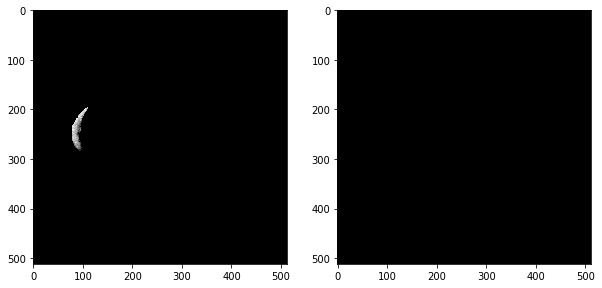

1 [0 1]


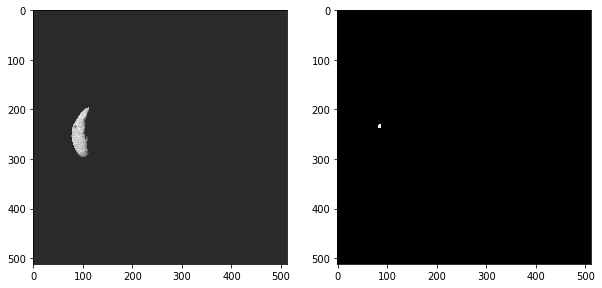

2 [0]


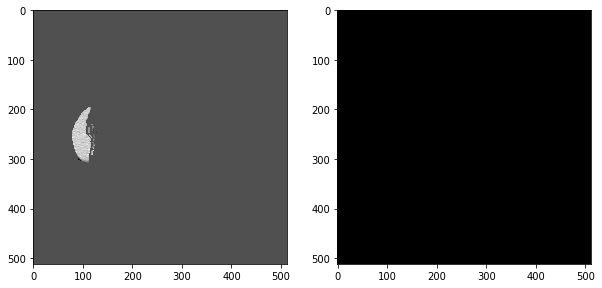

3 [0]


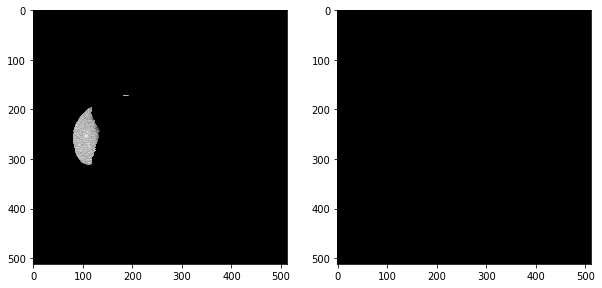

4 [0]


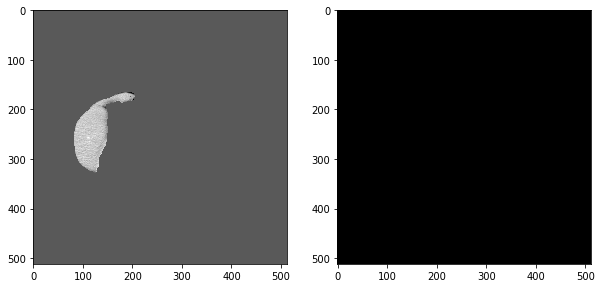

5 [0]


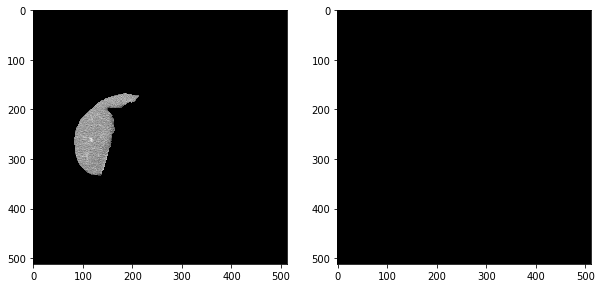

6 [0]


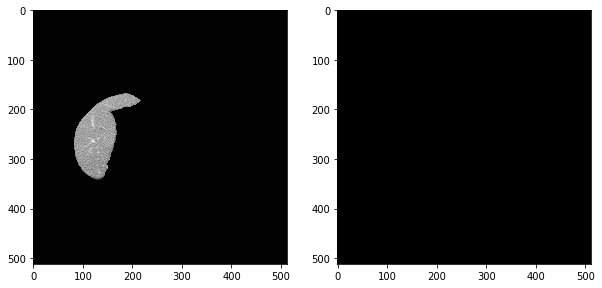

7 [0]


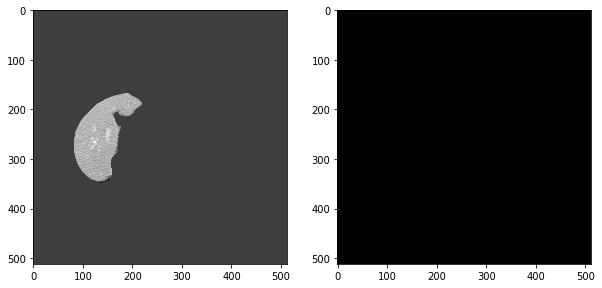

8 [0]


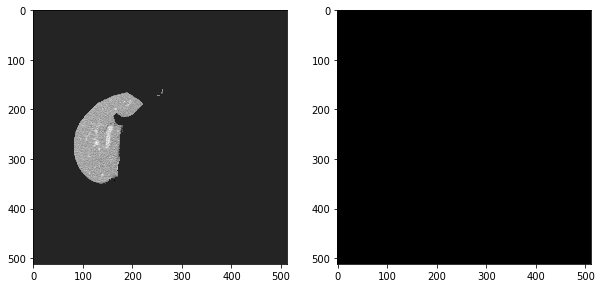

9 [0]


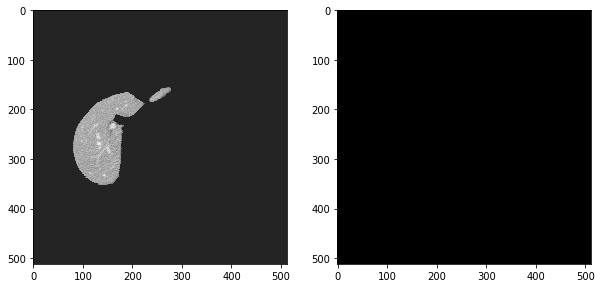

10 [0]


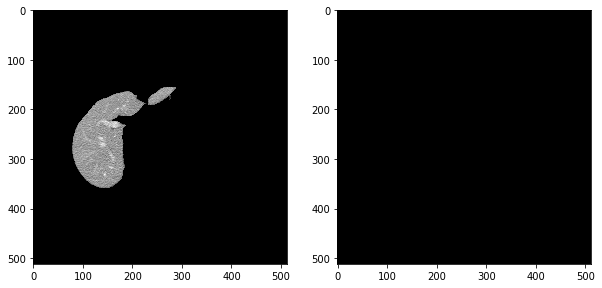

11 [0 1]


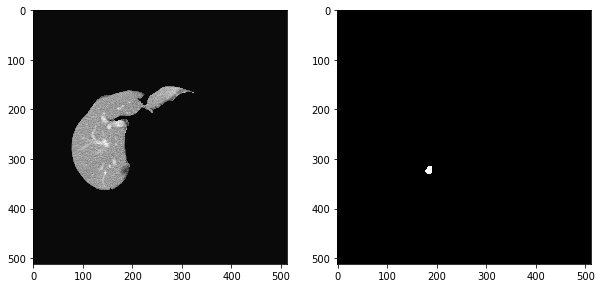

12 [0 1]


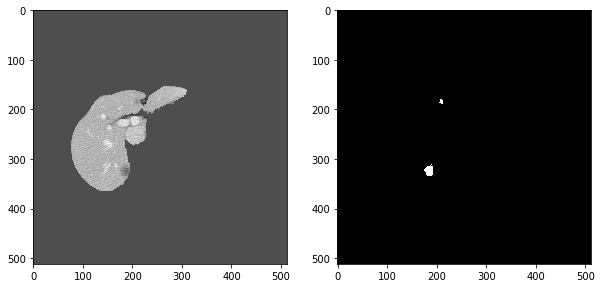

13 [0 1]


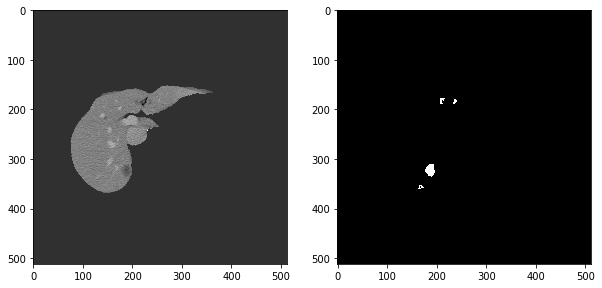

14 [0 1]


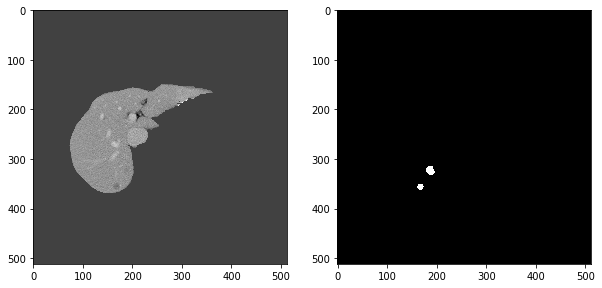

15 [0 1]


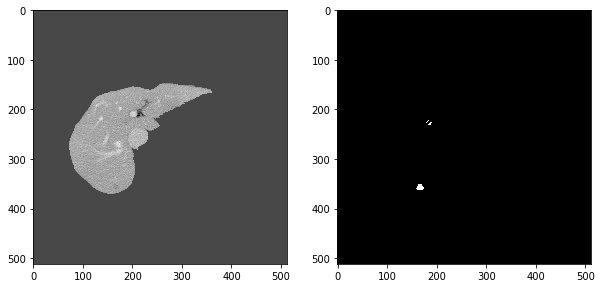

16 [0 1]


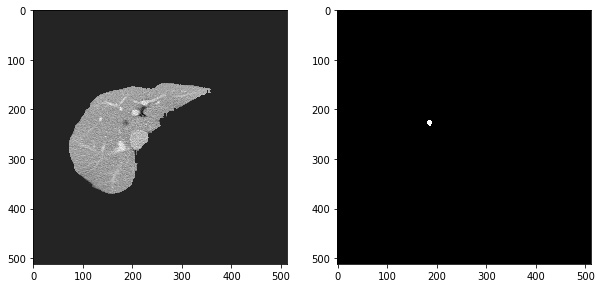

17 [0 1]


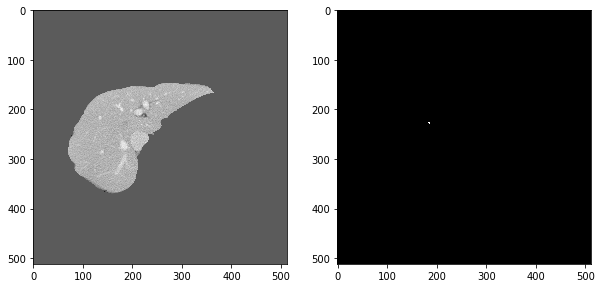

18 [0]


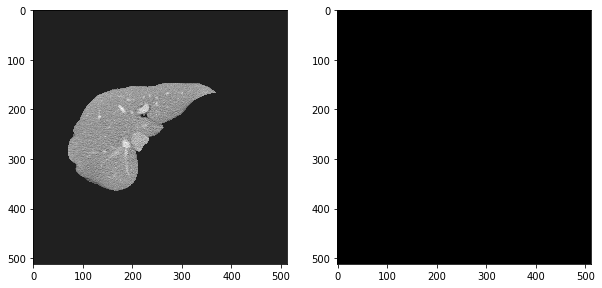

19 [0]


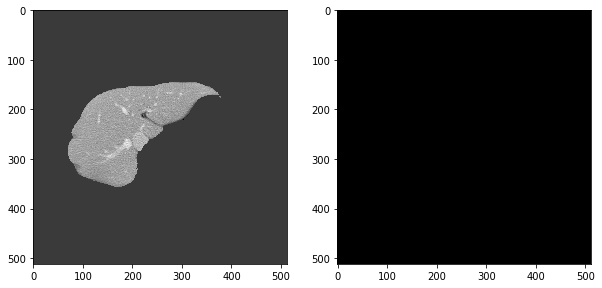

20 [0 1]


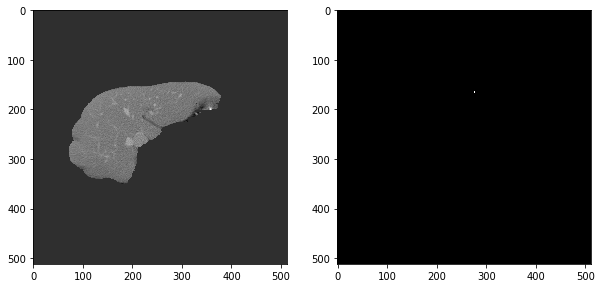

21 [0 1]


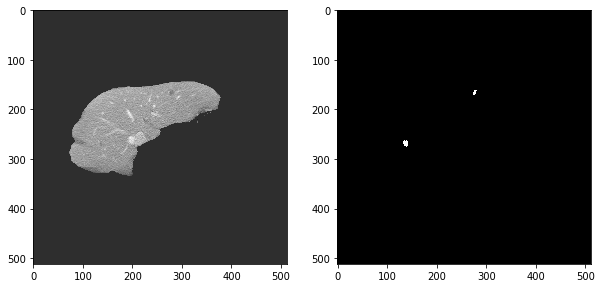

22 [0 1]


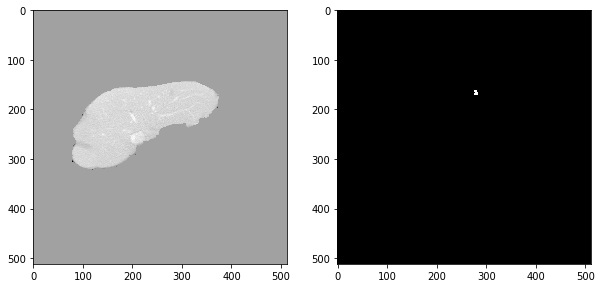

23 [0 1]


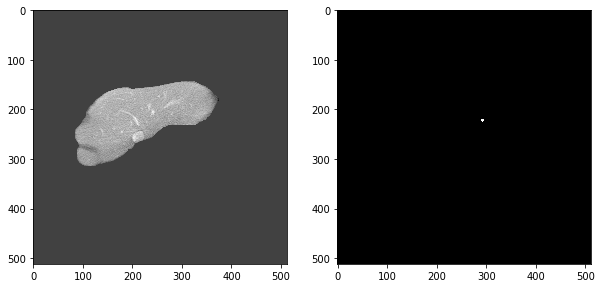

24 [0 1]


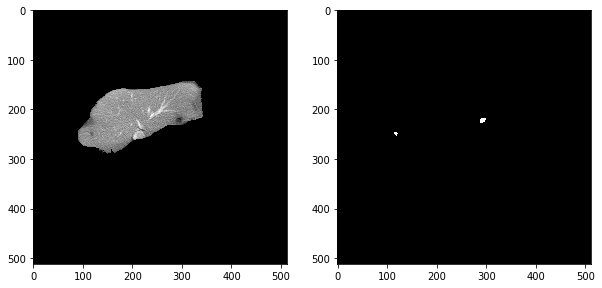

25 [0 1]


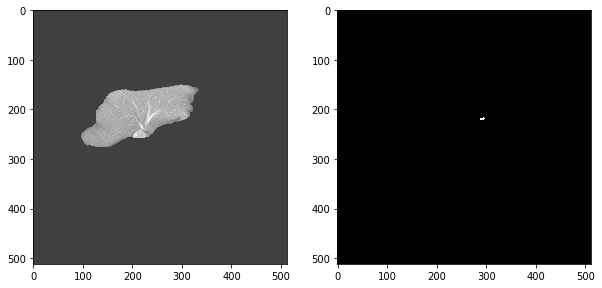

26 [0 1]


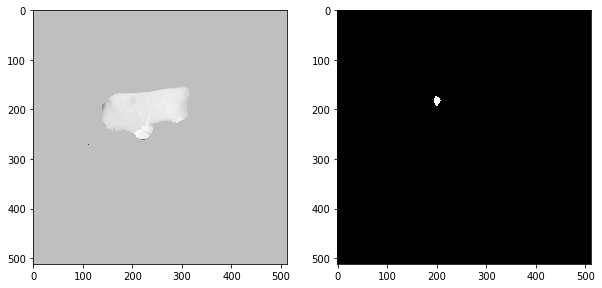

27 [0 1]


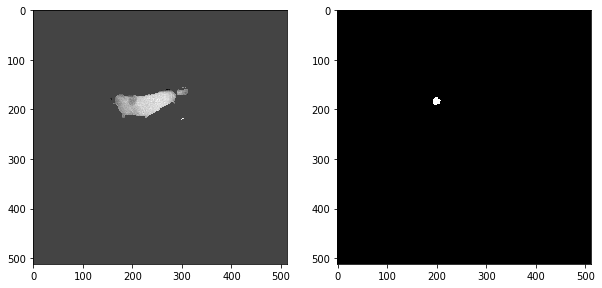

28 [0]


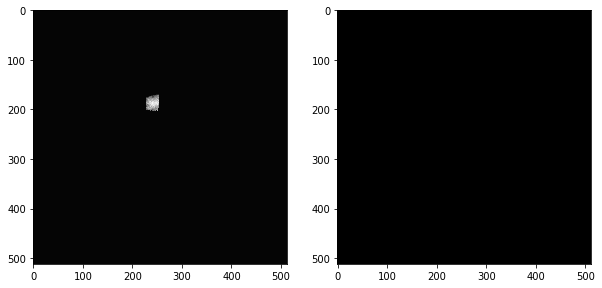

In [0]:
for ind in range(len(imgs)):
    print(ind, np.unique(masks[ind]))
    show_imgs2([imgs[ind], masks[ind]])